In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [ ]:
def preprocess_data(df, features_columns, label=None, z_score=False, standardize=False):
    print("------------------------------------------")
    print("            Preprocessing data            ")
    print("------------------------------------------")
    print("Get dataset")
    print("Shape of the data to process : " + str(df.shape))
    print("------------------------------------------")

    # Create inputs and labels
    # label
    if label is not None:
        print("Extract labels ...")
        df_labels = df['genre']

    # inputs
    print("Extract inputs ...")
    df = df[features_columns]
    # Remove outliers
    if z_score:
        print("Remove outliers with zscore ...")
        z_scores = zscore(df)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 4).all(axis=1)
        df = df[filtered_entries]
        if label is not None:
            df_labels = df_labels[filtered_entries]

    # Strandardize : center reduce
    if standardize:
        print("Center and reduce inputs ...")
        df = scale(df, axis=0, with_mean=True, with_std=True)
        df = pd.DataFrame(df, columns=features_columns)

    print("------------------------------------------")
    print("Data shape after preprocessing : " + str(df.shape))
    if label is not None:
        print("Labels shape : " + str(df_labels.shape))

    print("Return dataset(s) ...")
    print("Preprocessing finished")
    print("------------------------------------------")

    if label is not None:
        df_labels = pd.DataFrame(df_labels, columns=["genre"])
        res = (df, df_labels)
    else:
        res = df

    return res

In [ ]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving Spotify_train_dataset.csv to Spotify_train_dataset.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv(io.BytesIO(uploaded['Spotify_train_dataset.csv']))

features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']

label = 'genre'


df_normal = preprocess_data(df, features_columns, z_score=False, standardize=False)
print(f"Shape dataframe original :{df_normal.shape}")

le = LabelEncoder()
df_label_encoded = le.fit_transform(df[label])

df_normal_standardized = preprocess_data(df, features_columns, standardize=True)
print(f"Shape dataframe original standardized without outliers :{df_normal_standardized.shape}")
print(df_normal_standardized.head())

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Return dataset(s) ...
Preprocessing finished
------------------------------------------
Shape dataframe original :(31728, 13)
------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract inputs ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Return dataset(s) ...
Preprocessing finished
------------------------------------------
Shape dataframe original standardized without outliers :(31728, 13)
   danceability    en

In [ ]:
import keras
import tensorflow as tf 
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split


In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
target = encoder.fit_transform(df_label_encoded)


X_train,X_test,y_train,y_test = train_test_split(df_normal_standardized,
                                                 target,
                                                 test_size=0.30,
                                                 random_state=5)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    """build the Keras model callback"""
    model = keras.Sequential(
        [
        keras.Input(shape=(len(features_columns))),
        layers.Dense(len(features_columns), input_dim=4, activation='relu', name='layer_1'),
        layers.Dense(100, activation='relu', name='layer_2'),
        layers.Dense(100, activation='relu', name='layer_3'),
        layers.Dense(100, activation='relu', name='layer_4'),
        layers.Dense(100, activation='relu', name='layer_5'),
        layers.Dense(len(np.unique(df_label_encoded)), activation='softmax', name='output_layer')
        ]
    )
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

model_clf = create_model()

model_clf.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 13)                182       
_________________________________________________________________
layer_2 (Dense)              (None, 100)               1400      
_________________________________________________________________
layer_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
layer_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
layer_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 15)                1515      
Total params: 33,397
Trainable params: 33,397
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model_clf.fit(x = X_train,
                    y = y_train,
                    epochs = 50,
                    batch_size = 128,
                    validation_data = (X_test, y_test),
                    verbose = 1)

Epoch 1/50
174/174 [==============================] - 2s 7ms/step - loss: 2.1989 - accuracy: 0.2674 - val_loss: 1.5235 - val_accuracy: 0.4720
Epoch 2/50
174/174 [==============================] - 1s 3ms/step - loss: 1.4176 - accuracy: 0.5028 - val_loss: 1.3224 - val_accuracy: 0.5360
Epoch 3/50
174/174 [==============================] - 1s 4ms/step - loss: 1.2611 - accuracy: 0.5525 - val_loss: 1.1956 - val_accuracy: 0.5805
Epoch 4/50
174/174 [==============================] - 1s 3ms/step - loss: 1.1444 - accuracy: 0.5912 - val_loss: 1.1275 - val_accuracy: 0.6023
Epoch 5/50
174/174 [==============================] - 1s 3ms/step - loss: 1.0705 - accuracy: 0.6162 - val_loss: 1.1068 - val_accuracy: 0.6058
Epoch 6/50
174/174 [==============================] - 1s 3ms/step - loss: 1.0444 - accuracy: 0.6309 - val_loss: 1.0719 - val_accuracy: 0.6212
Epoch 7/50
174/174 [==============================] - 1s 4ms/step - loss: 1.0134 - accuracy: 0.6355 - val_loss: 1.0556 - val_accuracy: 0.6192
Epoch 

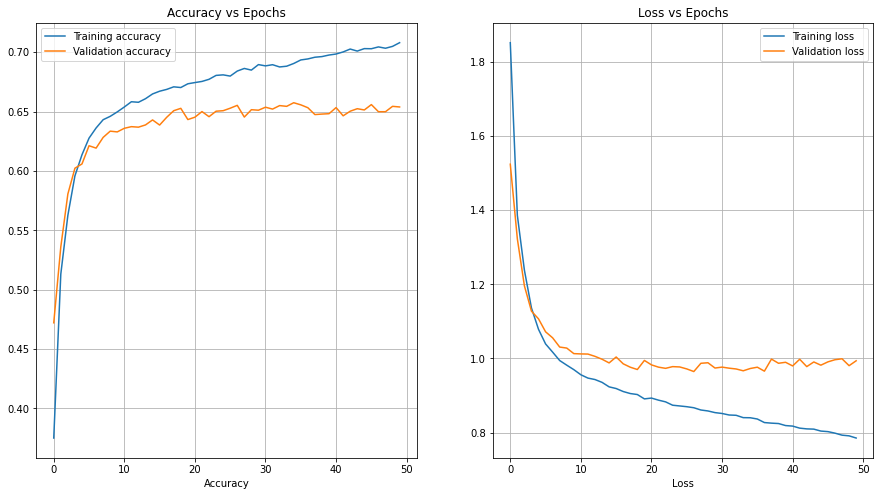

In [ ]:
history.history.keys()

fig, ax = plt.subplots(1, 2, figsize=(15,8))

ax[0].plot(history.history['accuracy'], label='Training accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Accuracy vs Epochs')
ax[0].set_xlabel('Number of Expochs')
ax[0].set_xlabel('Accuracy')

ax[1].plot(history.history['loss'], label='Training loss')
ax[1].plot(history.history['val_loss'], label='Validation loss')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Loss vs Epochs')
ax[1].set_xlabel('Number of Expochs')
ax[1].set_xlabel('Loss')
plt.show()

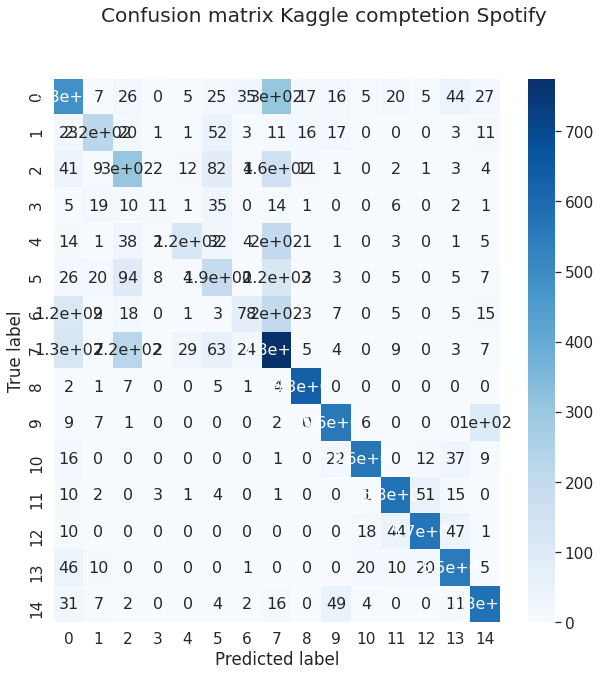

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns

y_pred = np.argmax(model_clf.predict(X_test), axis=-1)

y_test_decode = encoder.inverse_transform(y_test)

conf_mat = tf.math.confusion_matrix(
    y_test_decode,
    y_pred,
    num_classes = len(np.unique(y_test_decode))
)

fig = plt.figure(figsize=(10, 10))

df_cm = pd.DataFrame(conf_mat.numpy(), range(conf_mat.shape[0]), range(conf_mat.shape[1]))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={'Size':16}, cmap='Blues')

plt.suptitle('Confusion matrix Kaggle comptetion Spotify')
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import StackingClassifier

def make_classification_report(X, y, class_names, clf):
    kfold = KFold(n_splits=10, random_state=5)
    y_pred = cross_val_predict(clf, X, y, cv=kfold)
    cf_matrix = confusion_matrix(y, y_pred)

    fig, ax = plt.subplots(figsize=(15,15))

    sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='hot_r')
    plt.show()

    return classification_report(y, y_pred, target_names=class_names)


In [ ]:
estimators = [
    ('rf', RandomForestClassifier(random_state=5, max_depth=13, n_estimators=300)),
    ('knn', KNeighborsClassifier(n_neighbors=24, p=1)),
    ('svc', SVC())
]

meta_model = LogisticRegressionCV()

stacking_model = StackingClassifier(estimators=estimators,
                                    final_estimator=meta_model,
                                    passthrough=True,
                                    cv=5,
                                    verbose=2,
                                    n_jobs=-1)



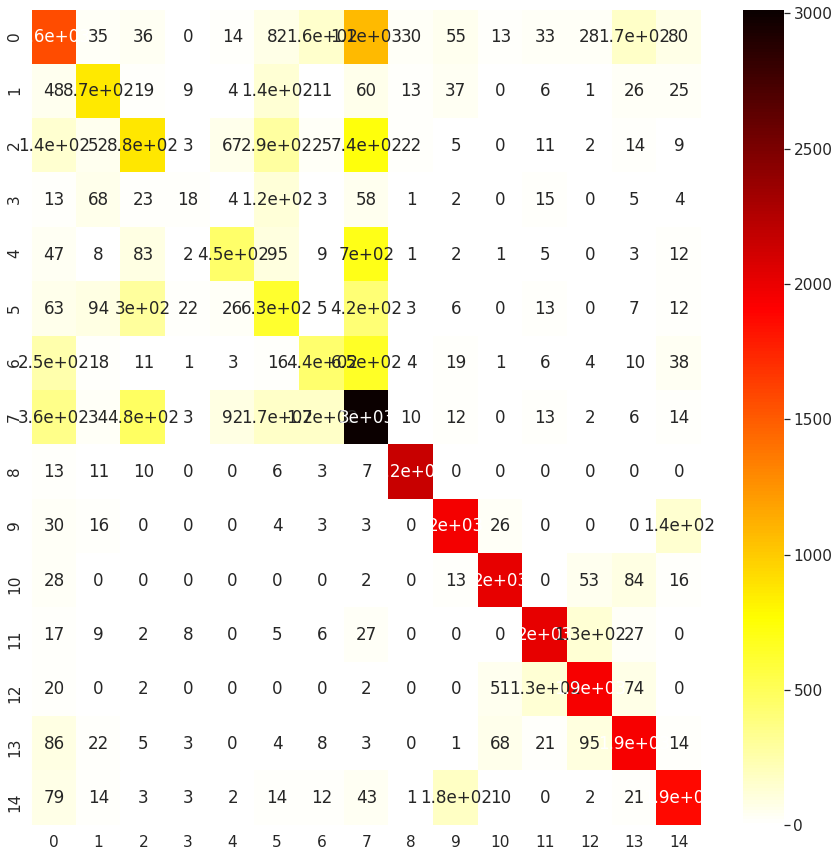

                 precision    recall  f1-score   support

      Dark Trap       0.57      0.46      0.51      3378
            Emo       0.69      0.69      0.69      1262
         Hiphop       0.47      0.39      0.43      2255
            Pop       0.25      0.05      0.09       336
            Rap       0.68      0.32      0.43      1420
            RnB       0.40      0.39      0.40      1605
     Trap Metal       0.51      0.30      0.38      1474
Underground Rap       0.44      0.69      0.54      4378
            dnb       0.96      0.98      0.97      2213
      hardstyle       0.85      0.90      0.88      2178
      psytrance       0.92      0.91      0.92      2214
      techhouse       0.89      0.90      0.89      2254
         techno       0.86      0.87      0.87      2226
         trance       0.81      0.85      0.83      2275
           trap       0.84      0.83      0.83      2260

       accuracy                           0.69     31728
      macro avg       0.68   

In [ ]:
print(make_classification_report(df_normal_standardized, df_label_encoded, le.classes_, stacking_model))